<a href="https://colab.research.google.com/github/SaamarthMeston/Capstone-Project-2---Rossmann-s-sales-prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

Mounting The  google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Sets and Creating Pandas Data Frames

In [3]:
Path1 = "/content/drive/MyDrive/Capstone Project-2 (Rossmann Retail Sales Prediction) /Data & Resource/Rossmann Stores Data.csv"
Path2 = "/content/drive/MyDrive/Capstone Project-2 (Rossmann Retail Sales Prediction) /Data & Resource/store.csv"

In [4]:
Rossmann_df = pd.read_csv(Path1)
Store_df = pd.read_csv(Path2)

<ipython-input-4-93fabc0ddddc>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Rossmann_df = pd.read_csv(Path1)


In [5]:
# Rossmann_df = pd.read_csv('C:/Users/Asus\Desktop/Data sets/ROSSMANN/Rossmann Stores Data(almabatter).csv')
# Store_df = pd.read_csv('C:/Users/Asus/Desktop/Data sets/ROSSMANN/store (almabatter).csv')

Data Exploration

Rossmann Dataframe

In [6]:
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
Rossmann_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


The Rossmann DataSet contains 1017209 rows and 9 Features with Store, DayofWeek, Customers, Open, Promo and SchoolHoliday being Intiger type and Date and StateHoliday being Object type

Store Data Frame

In [9]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
Store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


The Store DataSet contains 1115 rows and 10 Features with store and Promo2 being Intiger type, CompetitionDistance, CompetitionOpenSinceMonth,	CompetitionOpenSinceYear being Float Type and StoreType,	Assortment, PromoInterval being Object Type. 


Data Cleaning

looking for Null values in Rossmann Dataset.

In [11]:
Rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Looking for Null Values in Store Dataset.

In [12]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Null values in **CompetitionOpenSinceMonth** ,**CompetitionOpenSinceYear**, **Promo2SinceWeek**, **Promo2SinceYear**, **Promo2SinceYear** and 3 Null values in **CompetitionDistance**.

**Data Cleaning**

CompetitionDistance


In [14]:
Store_df[Store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


We will fill NAN values of CompetitionDistance with zero as this means they dont have a competetior in thier vicinity and thus ompetitionOpenSinceMonth	CompetitionOpenSinceYear NAN values related to these rows should alos be Zero.

In [15]:
Store_df['CompetitionDistance'].fillna(value= 0, inplace=True)

In [16]:
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].astype(int,copy =  False)

In [17]:
Store_df['CompetitionOpenSinceMonth'][Store_df['CompetitionDistance'] == 0]

290   NaN
621   NaN
878   NaN
Name: CompetitionOpenSinceMonth, dtype: float64

In [18]:
Store_df['CompetitionOpenSinceMonth'].mode()

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64

In [19]:
Store_df['CompetitionOpenSinceYear'].mode().astype(int)

0    2013
Name: CompetitionOpenSinceYear, dtype: int64

In [20]:
Store_df['CompetitionOpenSinceMonth'].fillna(9 ,inplace= True)

In [21]:
Store_df['CompetitionOpenSinceYear'].fillna(2013, inplace=True)

In [22]:
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].astype(int,copy =  False)
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].astype(int,copy =  False)

In [24]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 87.2+ KB


In [25]:
Store_df['CompetitionOpenSinceMonth'][Store_df['CompetitionDistance'] == 0] = 0

<ipython-input-25-0ff1ae236729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_df['CompetitionOpenSinceMonth'][Store_df['CompetitionDistance'] == 0] = 0


In [26]:
Store_df['CompetitionOpenSinceYear'][Store_df['CompetitionDistance'] == 0] = 0

<ipython-input-26-a8791c1d8e16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_df['CompetitionOpenSinceYear'][Store_df['CompetitionDistance'] == 0] = 0


In [27]:
Store_df[Store_df['CompetitionDistance'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0,0,0,0,NaN,NaN,NaN
621,622,a,c,0,0,0,0,NaN,NaN,NaN
878,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [28]:
Store_df['Promo2SinceWeek'][Store_df['Promo2'] == 0] = 0

<ipython-input-28-0b94dfa430c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_df['Promo2SinceWeek'][Store_df['Promo2'] == 0] = 0


In [29]:
Store_df['Promo2SinceYear'][Store_df['Promo2'] == 0] = 0

<ipython-input-29-752c257a3919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_df['Promo2SinceYear'][Store_df['Promo2'] == 0] = 0


In [30]:
Store_df['PromoInterval'][Store_df['Promo2'] == 0] = 0

<ipython-input-30-0160a8f3f04a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_df['PromoInterval'][Store_df['Promo2'] == 0] = 0


In [31]:
Store_df['Promo2SinceWeek'] = Store_df['Promo2SinceWeek'].astype(int,copy= False)

In [32]:
Store_df['Promo2SinceYear'] = Store_df['Promo2SinceYear'].astype(int,copy= False)

In [33]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB


In [34]:
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

MeArge

In [35]:
Rossmann_df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [36]:
Rossmann_df['Store'].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

In [37]:
Full_Df = pd.merge(Rossmann_df, Store_df, on = 'Store', how = 'left')
Full_Df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0


In [38]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  object
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  object
 10  Assortment                 1017209 non-null  object
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOpenSinceYear   

In [39]:
Full_Df['Date'] = pd.to_datetime(Full_Df['Date'], format= '%Y-%m-%d')

In [40]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [41]:
Full_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [42]:
Full_Df = Full_Df[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Sales']]

In [43]:
Full_Df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0,5263
1,2,5,2015-07-31,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0,13995
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0,4822


EDA

In [44]:
# sns.pairplot(Full_Df, diag_kind = 'hist',corner = True)
# plt.show

In [45]:
Full_Df['Sales'].max()

41551

In [46]:
Full_Df['Sales'][Full_Df['Sales'] == 0].value_counts()

0    172871
Name: Sales, dtype: int64

In [47]:
# plt.figure(figsize= (18,9))
# sns.histplot(Full_Df, x ='Sales')
# plt.xlim(1,42000)
# plt.ylim(0,12000)
# x=plt.axvline(Full_Df['Sales'].mean(), color = 'red')
# x2=plt.axvline(Full_Df['Sales'].median(), color = 'yellow',ls= '--')
# plt.title('Destribution of sales with its central tendencies')
# plt.legend(handles =[x,x2],labels= ['mean','median'])
# plt.show()

In [48]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  int64         
 11  CompetitionOpenSinceMonth  1017209 no

In [49]:
# # plt.figure(figsize = (10,10))
# sns.boxplot(Full_Df, x ='Store')
# plt.show()

In [50]:
# plt.figure(figsize = (10,10))
# sns.scatterplot(Full_Df, x ='Store', y ='Sales')
# plt.show()

In [51]:
# plt.figure(figsize = (12,12))
# sns.lmplot(Full_Df, x ='Store', y = 'Sales', hue = 'StoreType')

In [52]:
# plt.figure(figsize = (12,12))
# sns.barplot(Full_Df, x ='StoreType', y = 'Sales')

Feature Engioneering

In [53]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  int64         
 11  CompetitionOpenSinceMonth  1017209 no

In [54]:
Full_Df.corr()

<ipython-input-54-89bf81011d86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Full_Df.corr()


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
Store,1.000000,-8.483588e-06,0.024325,-0.000047,0.000058,0.000641,-0.026486,-3.760499e-02,-0.003069,0.008488,0.011053,0.008520,0.005126
DayOfWeek,-0.000008,1.000000e+00,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,4.050855e-07,-0.000015,0.000168,0.000208,0.000168,-0.462125
Customers,0.024325,-3.864447e-01,1.000000,0.616768,0.316169,0.071568,-0.102022,-2.070689e-02,0.019647,-0.150159,-0.098323,-0.150138,0.894711
Open,-0.000047,-5.289625e-01,0.616768,1.000000,0.295042,0.086171,0.007989,1.481914e-03,0.000501,-0.008309,-0.007436,-0.008308,0.678472
Promo,0.000058,-3.929253e-01,0.316169,0.295042,1.000000,0.067483,0.000141,5.119398e-06,0.000085,-0.000983,-0.001210,-0.000983,0.452345
SchoolHoliday,0.000641,-2.053883e-01,0.071568,0.086171,0.067483,1.000000,-0.003651,2.626710e-04,0.000953,-0.006909,-0.006679,-0.006912,0.085124
CompetitionDistance,-0.026486,-2.504515e-05,-0.102022,0.007989,0.000141,-0.003651,1.000000,-4.292884e-02,0.036885,-0.138832,-0.122348,-0.138896,-0.018609
CompetitionOpenSinceMonth,-0.037605,4.050855e-07,-0.020707,0.001482,0.000005,0.000263,-0.042929,1.000000e+00,0.143980,0.024883,0.024983,0.024890,-0.020320
CompetitionOpenSinceYear,-0.003069,-1.453241e-05,0.019647,0.000501,0.000085,0.000953,0.036885,1.439802e-01,1.000000,0.020631,0.032587,0.020612,0.016866
Promo2,0.008488,1.682793e-04,-0.150159,-0.008309,-0.000983,-0.006909,-0.138832,2.488283e-02,0.020631,1.000000,0.759240,0.999999,-0.091040


<ipython-input-55-c7930b67d58e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Full_Df.corr(), annot = True)


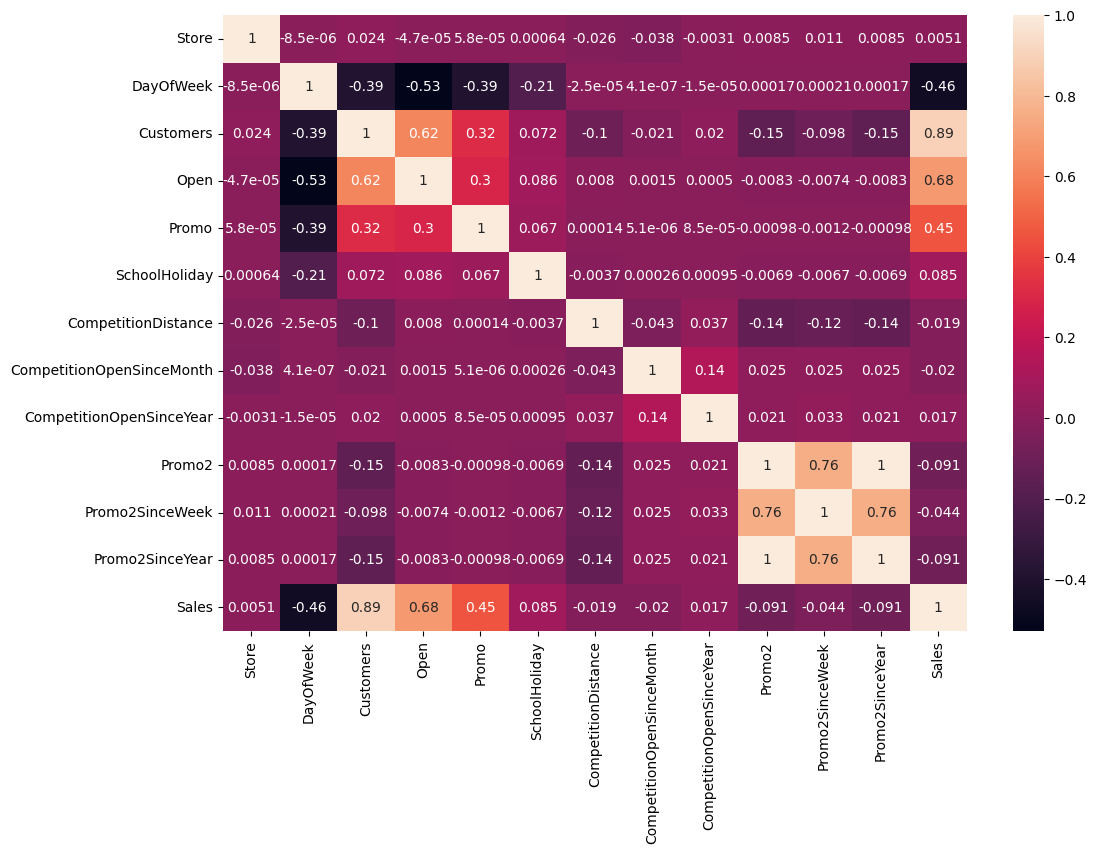

In [55]:
plt.figure(figsize= (12,8))
sns.heatmap(Full_Df.corr(), annot = True)
plt.show()

Customer is showing very high correlation with sales, which should be obviou but for study well make two Dataframes for modeling one with and one without Customers.

Treating Catagorical Feature

In [56]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  int64         
 11  CompetitionOpenSinceMonth  1017209 no

In [57]:
Full_Df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0,5263
1,2,5,2015-07-31,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0,13995
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0,4822


Dropping PromoInterval as it cant be converted into a Numeric feature

In [58]:
Full_Df.drop(['PromoInterval'], axis =1, inplace= True)

Converting StoreType into dummy veriable for regression

In [59]:
Full_Df = pd.get_dummies(Full_Df, columns = ['StoreType','Assortment','StateHoliday'], prefix =['StoreType','Assortment','StateHoliday'], drop_first= True)

In [60]:
Full_Df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Sales,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,555,1,1,1,1270,9,2008,...,5263,0,1,0,0,0,1,0,0,0
1,2,5,2015-07-31,625,1,1,1,570,11,2007,...,6064,0,0,0,0,0,1,0,0,0
2,3,5,2015-07-31,821,1,1,1,14130,12,2006,...,8314,0,0,0,0,0,1,0,0,0
3,4,5,2015-07-31,1498,1,1,1,620,9,2009,...,13995,0,1,0,0,1,1,0,0,0
4,5,5,2015-07-31,559,1,1,1,29910,4,2015,...,4822,0,0,0,0,0,1,0,0,0


In [61]:
Full_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   SchoolHoliday              1017209 non-null  int64         
 7   CompetitionDistance        1017209 non-null  int64         
 8   CompetitionOpenSinceMonth  1017209 non-null  int64         
 9   CompetitionOpenSinceYear   1017209 non-null  int64         
 10  Promo2                     1017209 non-null  int64         
 11  Promo2SinceWeek            1017209 no

In [62]:
Full_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Sales', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [63]:
Full_Df = Full_Df[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'Sales']]

<ipython-input-64-24ded9104d67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Full_Df.corr(), annot= True)


<Axes: >

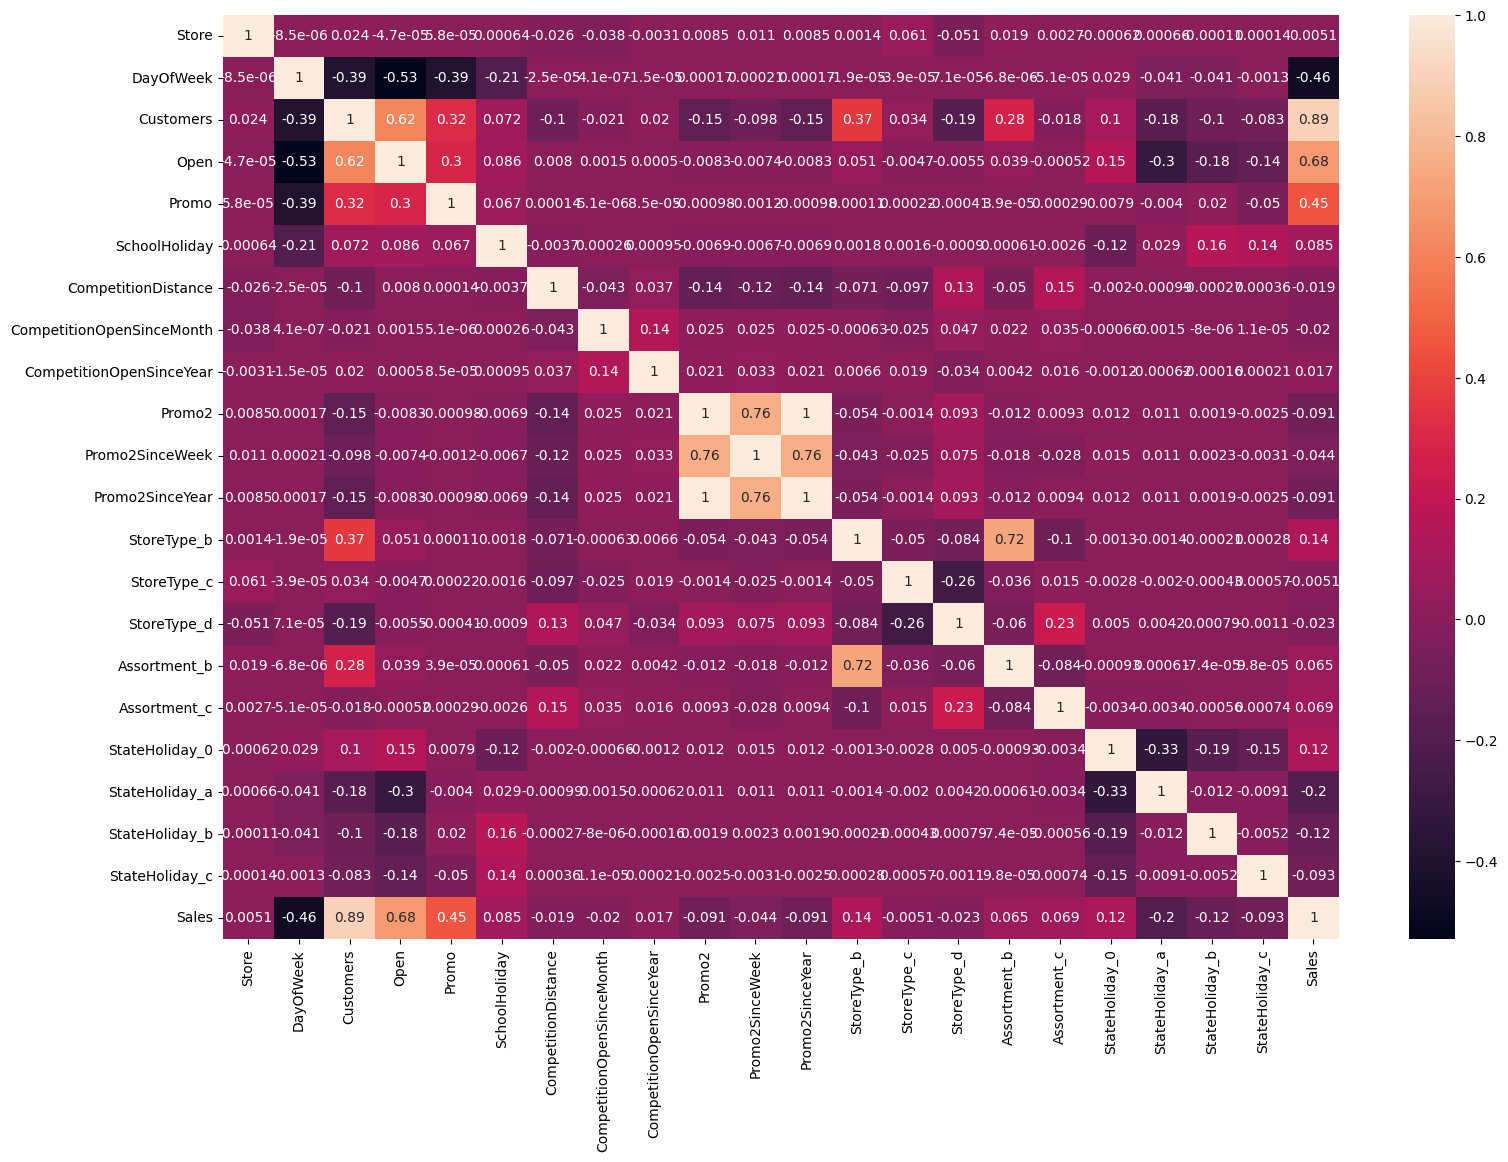

In [64]:
plt.figure(figsize= (18,12))
sns.heatmap(Full_Df.corr(), annot= True)

In [65]:
Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].unique()

array([0, 1], dtype=uint8)

In [66]:
Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].value_counts()

0    1001379
1       8294
Name: Assortment_b, dtype: int64

In [67]:
True_v_False=Full_Df['Assortment_b'][Full_Df['Assortment_b'] == Full_Df['StoreType_b']].value_counts()

In [68]:
Full_Df.shape

(1017209, 23)

In [69]:
print((True_v_False[0]+ True_v_False[1])/Full_Df.shape[0])

0.9925914929970143


StoreType_b explains 99.2% of Assotmernt_b values so we'll drop Assortment_b from the DataFrame

In [70]:
Full_Df.drop(['Assortment_b'],axis = 1,inplace=True)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def Cal_Vif(x):
  Vif_data = pd.DataFrame()
  Vif_data['features'] = x.columns
  Vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(Vif_data)

In [73]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales']]])

,features,VIF
0,Store,4.011280e+00
1,DayOfWeek,8.172304e+00
2,Customers,6.605429e+00
3,Open,1.392571e+01
4,Promo,2.009042e+00
5,SchoolHoliday,1.336376e+00
6,CompetitionDistance,1.641760e+00
7,CompetitionOpenSinceMonth,8.923922e+00
8,CompetitionOpenSinceYear,4.521311e+01
9,Promo2,1.576355e+06


StateHoliday_0, CompetitionOpenSinceMonth, DayOfWeek, Customers show vary high VIF value so we shall drop them

In [74]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','CompetitionOpenSinceMonth']]])

,features,VIF
0,Store,4.006104e+00
1,DayOfWeek,8.172294e+00
2,Customers,6.599625e+00
3,Open,1.392153e+01
4,Promo,2.008989e+00
5,SchoolHoliday,1.336376e+00
6,CompetitionDistance,1.635450e+00
7,CompetitionOpenSinceYear,3.699469e+01
8,Promo2,1.576272e+06
9,Promo2SinceWeek,3.993780e+00


In [75]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','CompetitionOpenSinceMonth','DayOfWeek']]])

,features,VIF
0,Store,4.004133e+00
1,Customers,6.566550e+00
2,Open,1.171436e+01
3,Promo,1.888852e+00
4,SchoolHoliday,1.314697e+00
5,CompetitionDistance,1.635424e+00
6,CompetitionOpenSinceYear,1.891274e+01
7,Promo2,1.576267e+06
8,Promo2SinceWeek,3.993753e+00
9,Promo2SinceYear,1.575222e+06


In [76]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','CompetitionOpenSinceMonth','DayOfWeek','StateHoliday_0']]])

,features,VIF
0,Store,4.003618e+00
1,Customers,6.564621e+00
2,Open,1.171347e+01
3,Promo,1.888849e+00
4,SchoolHoliday,1.309459e+00
5,CompetitionDistance,1.635421e+00
6,CompetitionOpenSinceYear,1.271814e+01
7,Promo2,1.576167e+06
8,Promo2SinceWeek,3.993403e+00
9,Promo2SinceYear,1.575121e+06


In [77]:
Cal_Vif(Full_Df[[i for i in Full_Df.describe().columns if i not in ['Sales','CompetitionOpenSinceMonth','DayOfWeek','StateHoliday_0','Customers']]])

,features,VIF
0,Store,4.001869e+00
1,Open,7.703343e+00
2,Promo,1.800753e+00
3,SchoolHoliday,1.308787e+00
4,CompetitionDistance,1.607009e+00
5,CompetitionOpenSinceYear,1.262606e+01
6,Promo2,1.576162e+06
7,Promo2SinceWeek,3.986422e+00
8,Promo2SinceYear,1.575117e+06
9,StoreType_b,1.046153e+00


In [78]:
Full_Df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_c', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Sales'],
      dtype='object')

In [79]:
Final_Df = Full_Df[['Store', 'Date', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_c', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Sales']]

In [80]:
Final_Df.head()

,Store,Date,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
0,1,2015-07-31,555,1,1,1,1270,2008,0,0,0,0,1,0,0,0,0,0,5263
1,2,2015-07-31,625,1,1,1,570,2007,1,13,2010,0,0,0,0,0,0,0,6064
2,3,2015-07-31,821,1,1,1,14130,2006,1,14,2011,0,0,0,0,0,0,0,8314
3,4,2015-07-31,1498,1,1,1,620,2009,0,0,0,0,1,0,1,0,0,0,13995
4,5,2015-07-31,559,1,1,1,29910,2015,0,0,0,0,0,0,0,0,0,0,4822


In [81]:
Final_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017209 non-null  int64         
 1   Date                      1017209 non-null  datetime64[ns]
 2   Customers                 1017209 non-null  int64         
 3   Open                      1017209 non-null  int64         
 4   Promo                     1017209 non-null  int64         
 5   SchoolHoliday             1017209 non-null  int64         
 6   CompetitionDistance       1017209 non-null  int64         
 7   CompetitionOpenSinceYear  1017209 non-null  int64         
 8   Promo2                    1017209 non-null  int64         
 9   Promo2SinceWeek           1017209 non-null  int64         
 10  Promo2SinceYear           1017209 non-null  int64         
 11  StoreType_b               1017209 non-null  uint8 

In [82]:
Final_Df.describe()

,Store,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,2.004832e+03,5.005638e-01,1.164767e+01,1.007011e+03,1.556219e-02,1.345250e-01,3.076182e-01,4.634937e-01,1.991724e-02,6.576820e-03,4.030637e-03,5.773819e+03
std,3.219087e+02,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,1.024459e+02,4.999999e-01,1.532393e+01,1.005877e+03,1.237741e-01,3.412156e-01,4.615078e-01,4.986658e-01,1.397160e-01,8.083051e-02,6.335925e-02,3.849926e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.727000e+03
50%,5.580000e+02,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.744000e+03
75%,8.380000e+02,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.856000e+03
max,1.115000e+03,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.155100e+04


now we shall remove rows which have Open and sales both as zero because their cant be any sale without opening the store

In [83]:
Final_Df['Sales'][Final_Df['Open']==0].unique()

array([0])

In [84]:
Final_Df.shape

(1017209, 19)

In [85]:
Final_Df[(Final_Df.Open == 0) & (Final_Df.Sales == 0)].shape

(172817, 19)

In [86]:
Final_Df.drop(Final_Df[(Final_Df.Open == 0) & (Final_Df.Sales == 0)].index ,axis = 0, inplace= True)

<ipython-input-86-5fbcc087247c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_Df.drop(Final_Df[(Final_Df.Open == 0) & (Final_Df.Sales == 0)].index ,axis = 0, inplace= True)


In [87]:
Final_Df

,Store,Date,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
0,1,2015-07-31,555,1,1,1,1270,2008,0,0,0,0,1,0,0,0,0,0,5263
1,2,2015-07-31,625,1,1,1,570,2007,1,13,2010,0,0,0,0,0,0,0,6064
2,3,2015-07-31,821,1,1,1,14130,2006,1,14,2011,0,0,0,0,0,0,0,8314
3,4,2015-07-31,1498,1,1,1,620,2009,0,0,0,0,1,0,1,0,0,0,13995
4,5,2015-07-31,559,1,1,1,29910,2015,0,0,0,0,0,0,0,0,0,0,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2013-01-01,566,1,0,1,150,2006,0,0,0,1,0,0,0,1,0,0,3375
1016827,733,2013-01-01,2377,1,0,1,860,1999,0,0,0,1,0,0,0,1,0,0,10765
1016863,769,2013-01-01,1248,1,0,1,840,2013,1,48,2012,1,0,0,0,1,0,0,5035
1017042,948,2013-01-01,1039,1,0,1,1430,2013,0,0,0,1,0,0,0,1,0,0,4491


Splitng data ito Target and Indpendent Data_frames

In [88]:
Target_Df = Final_Df['Sales']

In [89]:
Independent_Df = Final_Df.drop('Sales', axis = 1)

Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
Target_Df.info()

<class 'pandas.core.series.Series'>
Int64Index: 844392 entries, 0 to 1017190
Series name: Sales
Non-Null Count   Dtype
--------------   -----
844392 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [92]:
Independent_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Store                     844392 non-null  int64         
 1   Date                      844392 non-null  datetime64[ns]
 2   Customers                 844392 non-null  int64         
 3   Open                      844392 non-null  int64         
 4   Promo                     844392 non-null  int64         
 5   SchoolHoliday             844392 non-null  int64         
 6   CompetitionDistance       844392 non-null  int64         
 7   CompetitionOpenSinceYear  844392 non-null  int64         
 8   Promo2                    844392 non-null  int64         
 9   Promo2SinceWeek           844392 non-null  int64         
 10  Promo2SinceYear           844392 non-null  int64         
 11  StoreType_b               844392 non-null  uint8         
 12  S

In [93]:
Independent_Df.columns

Index(['Store', 'Date', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_c', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c'],
      dtype='object')

In [95]:
Independent_Df_2 = Independent_Df[['Date','Open','Promo','StoreType_b','StoreType_c','StoreType_d','Assortment_c','StateHoliday_a','StateHoliday_b','StateHoliday_c','SchoolHoliday','Promo2']]

In [96]:
Independent_Df_2

,Date,Open,Promo,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday,Promo2
0,2015-07-31,1,1,0,1,0,0,0,0,0,1,0
1,2015-07-31,1,1,0,0,0,0,0,0,0,1,1
2,2015-07-31,1,1,0,0,0,0,0,0,0,1,1
3,2015-07-31,1,1,0,1,0,1,0,0,0,1,0
4,2015-07-31,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,2013-01-01,1,0,1,0,0,0,1,0,0,1,0
1016827,2013-01-01,1,0,1,0,0,0,1,0,0,1,0
1016863,2013-01-01,1,0,1,0,0,0,1,0,0,1,1
1017042,2013-01-01,1,0,1,0,0,0,1,0,0,1,0


In [97]:
Independent_Df1 = Independent_Df.drop(['Date','Open','Promo','StoreType_b','StoreType_c','StoreType_d','Assortment_c','StateHoliday_a','StateHoliday_b','StateHoliday_c','SchoolHoliday','Promo2'],axis = 1)

In [98]:
Independent_Df1.columns

Index(['Store', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear'],
      dtype='object')

In [99]:
columns = ['Store', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear']

In [100]:
Scale = MinMaxScaler(feature_range = (0,1))

In [101]:
Scale.fit_transform(Independent_Df1)

array([[0.00000000e+00, 7.51218192e-02, 1.67413657e-02, 9.96526055e-01,
        0.00000000e+00, 0.00000000e+00],
       [8.97666068e-04, 8.45966432e-02, 7.51384129e-03, 9.96029777e-01,
        2.60000000e-01, 9.97518610e-01],
       [1.79533214e-03, 1.11126151e-01, 1.86264171e-01, 9.95533499e-01,
        2.80000000e-01, 9.98014888e-01],
       ...,
       [6.89407540e-01, 1.68922577e-01, 1.10730293e-02, 9.99007444e-01,
        9.60000000e-01, 9.98511166e-01],
       [8.50089767e-01, 1.40633460e-01, 1.88505141e-02, 9.99007444e-01,
        0.00000000e+00, 0.00000000e+00],
       [9.83842011e-01, 1.90173254e-01, 9.49116794e-03, 9.93548387e-01,
        0.00000000e+00, 0.00000000e+00]])

In [102]:
Independent_Df1 = Scale.transform(Independent_Df1)

In [103]:
Independent_Df_1 = pd.DataFrame(Independent_Df1, columns = columns)

In [104]:
Independent_Df_1

,Store,Customers,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
0,0.000000,0.075122,0.016741,0.996526,0.00,0.000000
1,0.000898,0.084597,0.007514,0.996030,0.26,0.997519
2,0.001795,0.111126,0.186264,0.995533,0.28,0.998015
3,0.002693,0.202761,0.008173,0.997022,0.00,0.000000
4,0.003591,0.075663,0.394279,1.000000,0.00,0.000000
...,...,...,...,...,...,...
844387,0.611311,0.076611,0.001977,0.995533,0.00,0.000000
844388,0.657092,0.321738,0.011337,0.992060,0.00,0.000000
844389,0.689408,0.168923,0.011073,0.999007,0.96,0.998511
844390,0.850090,0.140633,0.018851,0.999007,0.00,0.000000


In [107]:
Independent_Final_Df = pd.concat([Independent_Df_1,Independent_Df_2], axis= 1)

In [109]:
Independent_Final_Df.head()

,Store,Customers,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Date,Open,Promo,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday,Promo2
0,0.000000,0.075122,0.016741,0.996526,0.00,0.000000,2015-07-31,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000898,0.084597,0.007514,0.996030,0.26,0.997519,2015-07-31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.001795,0.111126,0.186264,0.995533,0.28,0.998015,2015-07-31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.002693,0.202761,0.008173,0.997022,0.00,0.000000,2015-07-31,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.003591,0.075663,0.394279,1.000000,0.00,0.000000,2015-07-31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
Independent_Final_Df.columns

Index(['Store', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Date', 'Open', 'Promo',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday',
       'Promo2'],
      dtype='object')

In [111]:
Independent_Final_Df = Independent_Final_Df[['Store', 'Customers','Date','Open', 'CompetitionDistance', 'CompetitionOpenSinceYear',
       'Promo','Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_c',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday',
       ]]

In [112]:
Independent_Final_Df.describe()

,Store,Customers,Open,CompetitionDistance,CompetitionOpenSinceYear,Promo,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday
count,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,0.500380,0.103239,1.0,0.071762,0.994965,0.446352,0.498684,0.231922,0.497881,0.018431,0.133798,0.306462,0.463376,0.000822,0.000172,0.000084,0.193580
std,0.288808,0.054308,0.0,0.102877,0.050759,0.497114,0.499999,0.306157,0.499193,0.134504,0.340435,0.461024,0.498657,0.028657,0.013103,0.009169,0.395103
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250449,0.070249,1.0,0.009228,0.996526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.091500,1.0,0.030583,0.998511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750449,0.120872,1.0,0.090693,0.999007,1.000000,1.000000,0.440000,0.998511,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
